### Prepairing a dataset to spply convolutional neural network processing using dataset augmentation technique.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
#extracting data
url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
path_to_zip = tf.keras.utils.get_file("cats_and_dogs.zip", origin=url, extract=True)

In [3]:
path = os.path.join(os.path.dirname(path_to_zip), "cats_and_dogs_filtered")
print(path)

/root/.keras/datasets/cats_and_dogs_filtered


In [4]:
#making training and testings dataset
train_dir = os.path.join(path,"train")
print("Training Directory", train_dir)

Training Directory /root/.keras/datasets/cats_and_dogs_filtered/train


In [15]:
test_dir = os.path.join(path, "validation")
print("Testing Directory", test_dir)

Testing Directory /root/.keras/datasets/cats_and_dogs_filtered/validation


In [16]:
batch_size = 32
img_size = (160,160)

In [17]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir, batch_size = batch_size, image_size = img_size)
test_dataset = tf.keras.utils.image_dataset_from_directory(test_dir, batch_size = batch_size, image_size = img_size)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [20]:
#code for applying dataset augmentation
dataset_augmentation = tf.keras.Sequential([tf.keras.layers.RandomFlip("horizontal"), tf.keras.layers.RandomRotation(0.2)])

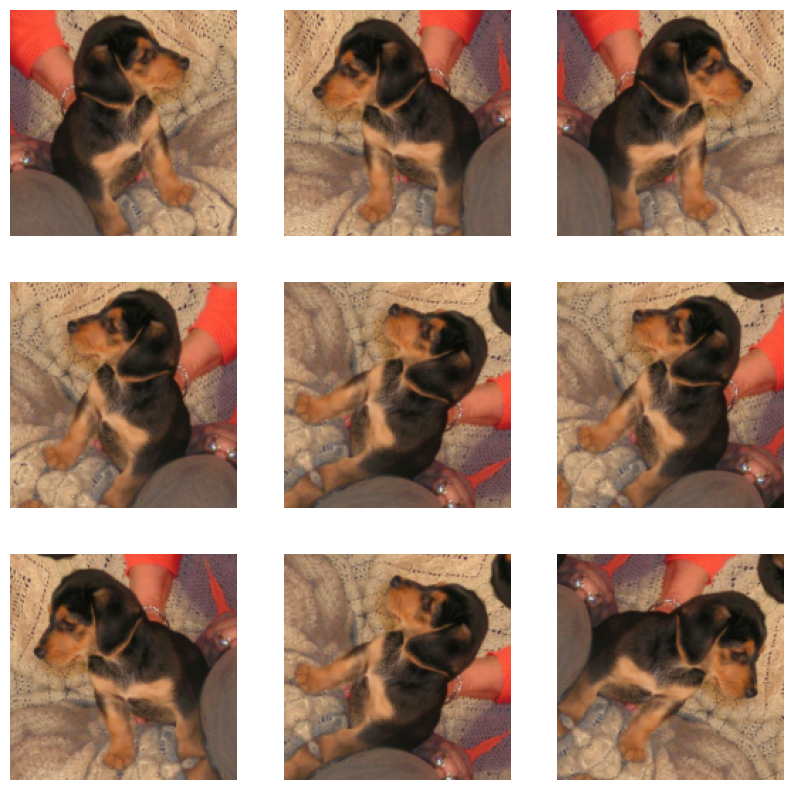

In [25]:
#displaying the results of dataset augmentation by taking an image into consideration
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10,10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    augmented_image=dataset_augmentation(tf.expand_dims(first_image,0))
    plt.imshow(augmented_image[0]/255)
    plt.axis("off")